<a href="https://colab.research.google.com/github/ahmedmek1/Deep-learning-projects/blob/main/ECG_dataAnalysis_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction


In this notebook i want to predict different arrhytmia on ECG.
based on The MIT-BIH Arrhythmia Database contains 48 half-hour excerpts
of two-channel ambulatory ECG recordings, obtained from 47 subjects 
studied by the BIH Arrhythmia Laboratory between 1975 and 1979.
Twenty-three recordings were chosen at random from a set of 
4000 24-hour ambulatory ECG recordings collected from a mixed
population of inpatients (about 60%) and outpatients 
(about 40%)
at Boston's Beth Israel Hospital; the remaining 25 recordings
were selected from the same set to include less common but
clinically significant arrhythmias that would not be
well-represented in a small random sample.


   * souces : https://physionet.org/content/mitdb/1.0.0/

Arrhythmia Dataset


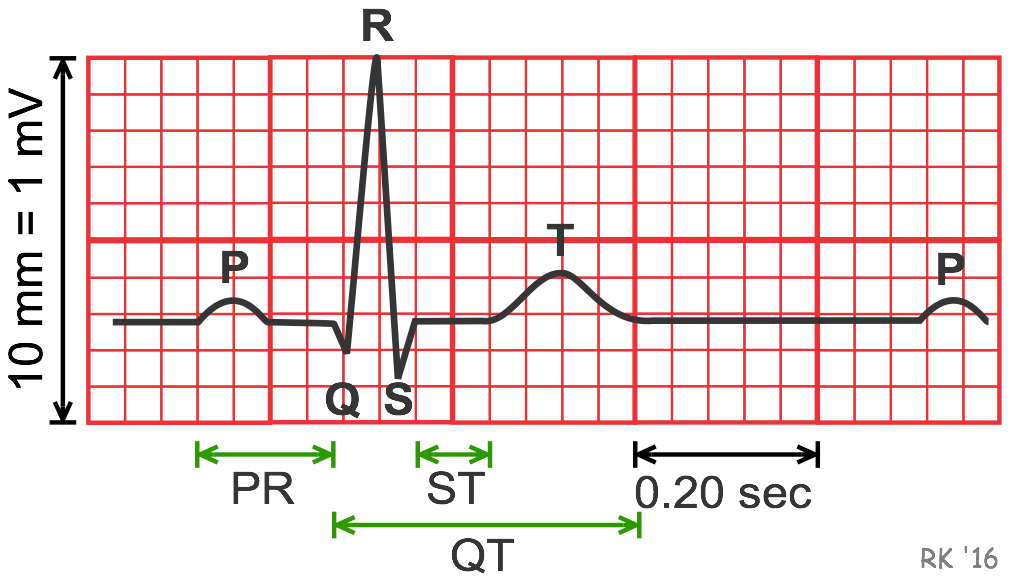

* Connecting to Google Drive 

In [ ]:
#Connect to google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/


/content/drive/My Drive/Colab Notebooks


## Data Exploration and preparation 

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train_df = pd.read_csv('mitbih_train.csv' ,header = None)
test_df = pd.read_csv('mitbih_test.csv' ,header = None)

In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_df.shape

(87554, 188)

In [ ]:
test_df.shape

(21892, 188)

## Data Analysis and Visualization

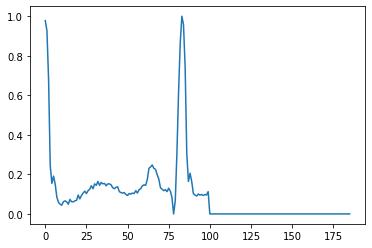

In [ ]:
plt.plot(train_df.iloc[0,:186])

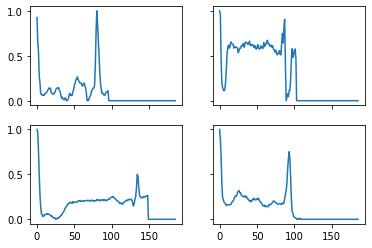

In [ ]:
import random 
n = random.random() 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(train_df.iloc[3,:186])
ax2.plot(train_df.iloc[2000,:186])
ax3.plot(test_df.iloc[20000,:186])
ax4.plot(test_df.iloc[85,:186])

for ax in fig.get_axes():
    ax.label_outer()

In [ ]:
train_df[187]=train_df[187].astype(int)
test_df[187]=test_df[187].astype(int)
Data_Balance=train_df[187].value_counts()
Data_Balance

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

* check the statues of the dataset

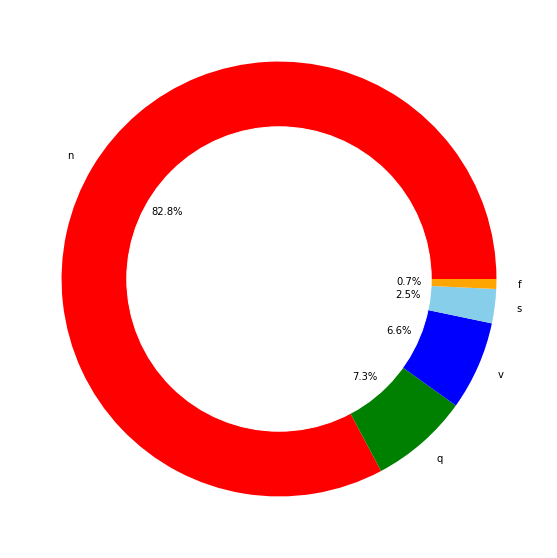

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(Data_Balance, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

* here we notice that the data is unbalanced so we will apply resampling to the data and data augmentation 

### Resampling and Data Augmentation





In [ ]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=25000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=25000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=25000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=25000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=25000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [ ]:
Data_Balance =train_df[187].value_counts()
Data_Balance

0    25000
1    25000
2    25000
3    25000
4    25000
Name: 187, dtype: int64

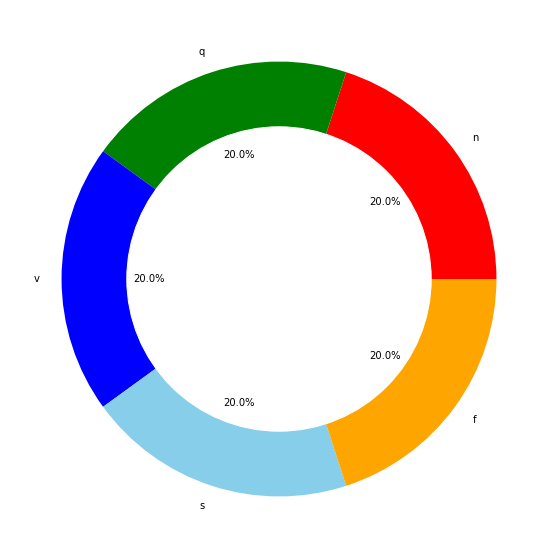

In [ ]:
plt.figure(figsize=(30,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(Data_Balance, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
train_df[187].value_counts()

0    25000
1    25000
2    25000
3    25000
4    25000
Name: 187, dtype: int64

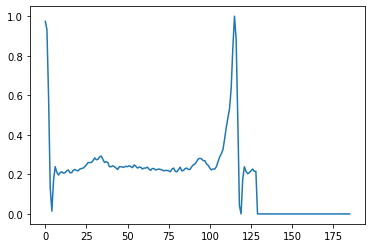

In [ ]:
plt.plot(train_df.iloc[2,:186])

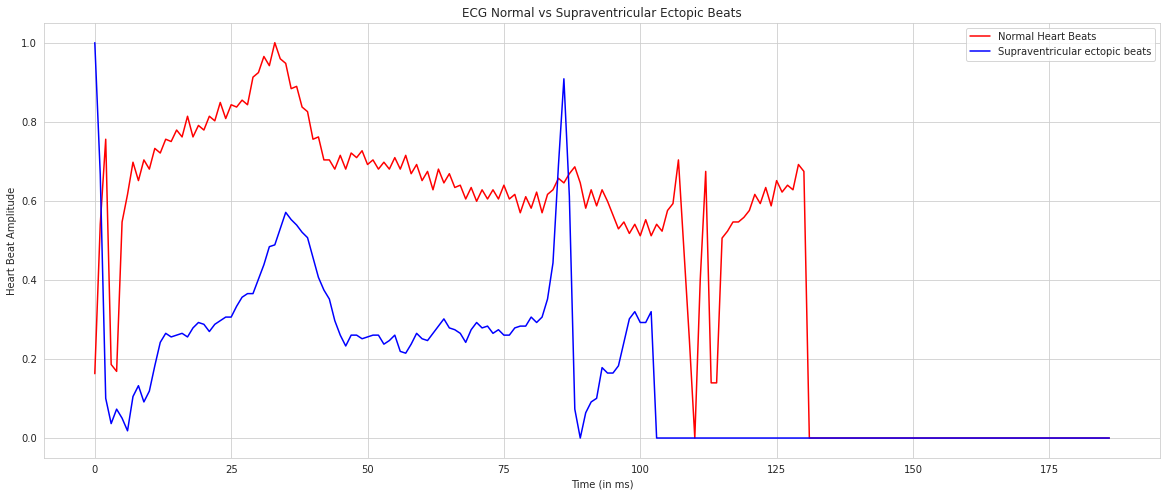

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(train_df.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(df_1.iloc[0, 0:187], color = 'blue', label = 'Supraventricular ectopic beats')
plt.title("ECG Normal vs Supraventricular Ectopic Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

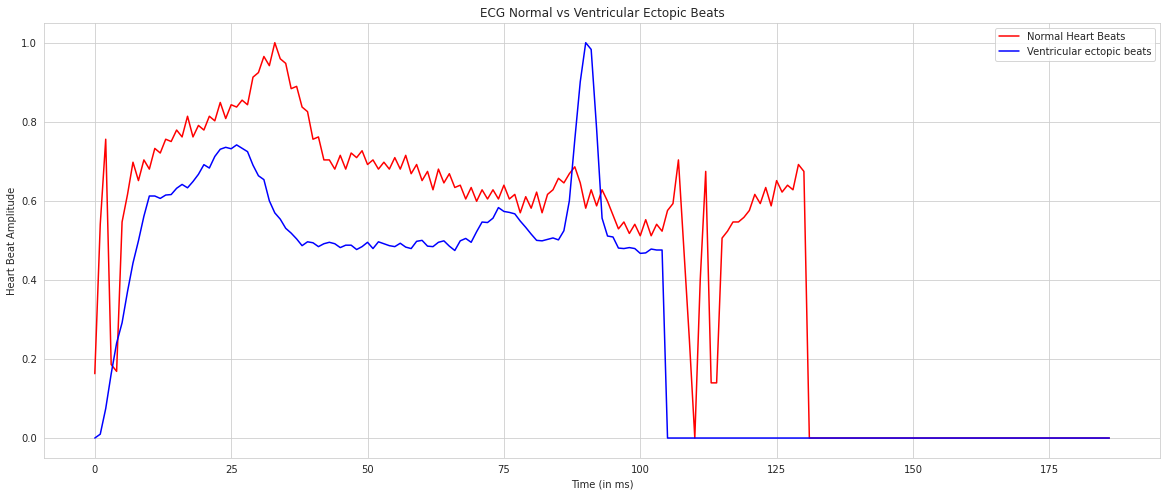

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(train_df.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(df_2.iloc[0, 0:187], color = 'blue', label = 'Ventricular ectopic beats')
plt.title("ECG Normal vs Ventricular Ectopic Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

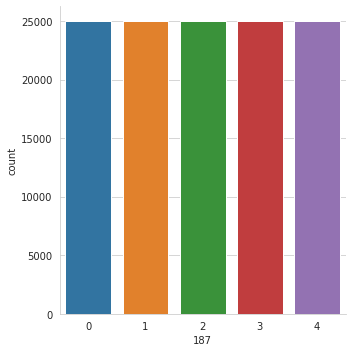

In [ ]:
# Display counts of each classes - Most of Data samples are of normal HeartBeats & its a biased data
sns.catplot(x = 187, kind = 'count', data = train_df)

In [ ]:
train_df.shape

(125000, 188)

In [ ]:
#taking samples from each class 
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [ ]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
29005,1.000000,0.814815,0.375661,0.190476,0.142857,0.111111,0.121693,0.148148,0.164021,0.153439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
72534,1.000000,0.886100,0.619691,0.335907,0.162162,0.140927,0.164093,0.169884,0.169884,0.171815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78532,0.877506,0.839644,0.768374,0.610245,0.447661,0.331849,0.311804,0.329621,0.483296,0.387528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80817,0.464135,0.122363,0.000000,0.130802,0.383966,0.565401,0.717300,0.793249,0.831224,0.835443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
85415,0.906511,0.883139,0.749583,0.512521,0.360601,0.397329,0.422371,0.398998,0.398998,0.370618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


* here i will generalize my training data by adding noise on it

In [ ]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)

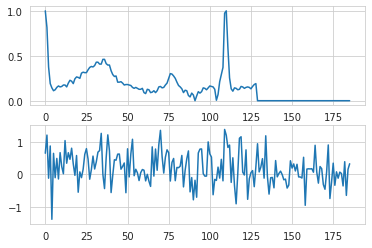

In [ ]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [ ]:
from keras.utils.np_utils import to_categorical
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [ ]:
test_df[187].shape

(21892,)

In [ ]:

X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [ ]:
X_train.shape
X_test.shape

(21892, 186, 1)

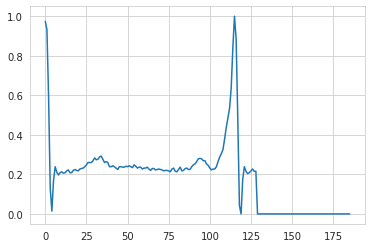

In [ ]:
plt.plot(X_train[2,:186])

In [ ]:
# For conv1D dimentionality should be 187X1 where 187 is number of features and 1 = 1D Dimentionality of data
# X_train = X_train.reshape(len(X_train),X_train.shape[1],1)
# X_test = X_test.reshape(len(X_test),X_test.shape[1],1)

### Building the Model
* Using CNN



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X_train,y_train,random_state=42,stratify = y_train ,shuffle=True,train_size=0.82)
print("The shape of training data : ",X_train.shape,y_train.shape)
print("The shape of validation data : ",X_test.shape,y_test.shape)

The shape of training data :  (125000, 186, 1) (102500, 5)
The shape of validation data :  (21892, 186, 1) (21892, 5)


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:

#from keras.models import Sequential
#im_shape=(X_train.shape[1],1)
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Conv1D(64, 6, activation='relu', input_shape= (186 , 1) ))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling1D(2, strides = 2, padding = 'same'))

model.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 6, activation='relu'))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

model.add(tf.keras.layers.Conv1D( filters = 64, kernel_size = 6, activation='relu'))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

model.add(tf.keras.layers.Conv1D( filters = 32, kernel_size = 5, activation='relu'))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(5, activation='softmax'))


In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_19 (Conv1D)          (None, 181, 64)           448       
                                                                 
 batch_normalization_19 (Bat  (None, 181, 64)          256       
 chNormalization)                                                
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 91, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_20 (Conv1D)          (None, 86, 64)            24640     
                                                                 
 batch_normalization_20 (Bat  (None, 86, 64)           256       
 chNormalization)                                                
                                                      

In [ ]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 40, validation_data=(x_val, y_val))

Epoch 1/20
2563/2563 [==============================] - 44s 14ms/step - loss: 0.2990 - accuracy: 0.8938 - val_loss: 0.2218 - val_accuracy: 0.9201
Epoch 2/20
2563/2563 [==============================] - 36s 14ms/step - loss: 0.1569 - accuracy: 0.9455 - val_loss: 0.1272 - val_accuracy: 0.9532
Epoch 3/20
2563/2563 [==============================] - 38s 15ms/step - loss: 0.1213 - accuracy: 0.9596 - val_loss: 0.1198 - val_accuracy: 0.9588
Epoch 4/20
2563/2563 [==============================] - 36s 14ms/step - loss: 0.1009 - accuracy: 0.9679 - val_loss: 0.1143 - val_accuracy: 0.9652
Epoch 5/20
2563/2563 [==============================] - 38s 15ms/step - loss: 0.0904 - accuracy: 0.9714 - val_loss: 0.0910 - val_accuracy: 0.9707
Epoch 6/20
2563/2563 [==============================] - 35s 14ms/step - loss: 0.0800 - accuracy: 0.9751 - val_loss: 0.1391 - val_accuracy: 0.9650
Epoch 7/20
2563/2563 [==============================] - 36s 14ms/step - loss: 0.0770 - accuracy: 0.9771 - val_loss: 0.1108 -

In [ ]:
# evaluate ECG Test Data
model.evaluate(X_test, y_test)

685/685 [==============================] - 4s 5ms/step - loss: 0.2199 - accuracy: 0.9621


[0.219858780503273, 0.9620866179466248]

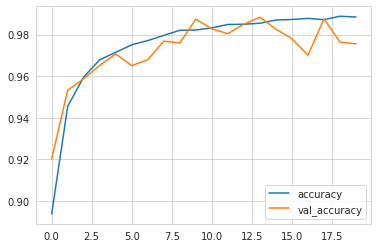

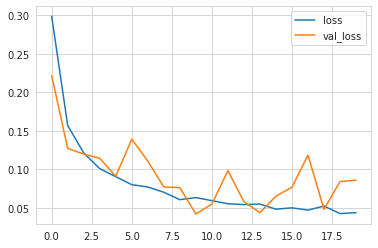

In [ ]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [ ]:
y_pred = model.predict(X_test, batch_size=1000)

In [ ]:
y_pred

array([[9.9998593e-01, 8.5500410e-08, 1.1766359e-12, 4.3435822e-08,
        1.3916509e-05],
       [9.9068612e-01, 1.5317976e-03, 6.6672183e-05, 7.4521871e-04,
        6.9701672e-03],
       [1.0000000e+00, 3.8804849e-24, 7.7555801e-22, 1.4156572e-14,
        4.2015171e-34],
       ...,
       [5.1665641e-08, 1.7270587e-25, 4.6050972e-09, 4.6458880e-33,
        1.0000000e+00],
       [2.0515111e-26, 0.0000000e+00, 1.6055096e-24, 0.0000000e+00,
        1.0000000e+00],
       [2.0503797e-23, 0.0000000e+00, 9.9391078e-17, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)

Normalized confusion matrix


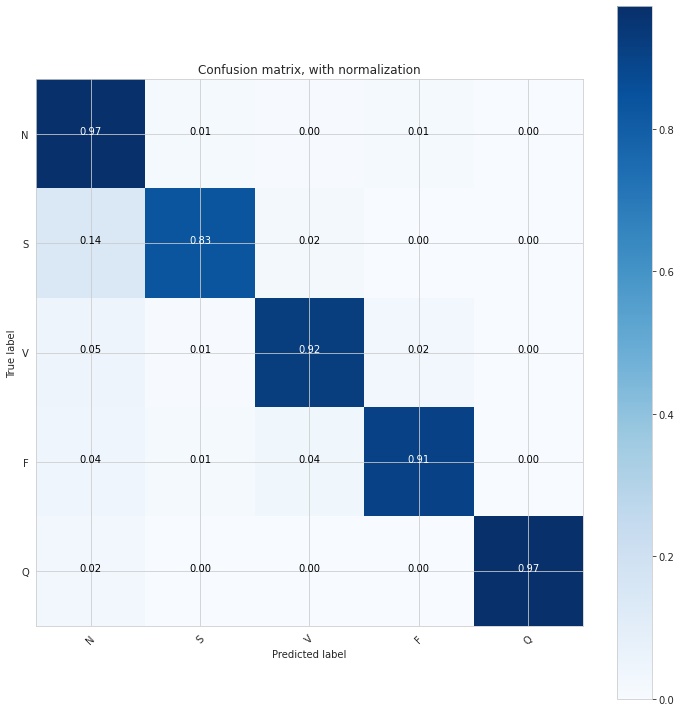

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

In [ ]:
yhat = np.argmax(y_pred, axis = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), yhat))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     18118
           1       0.65      0.83      0.73       556
           2       0.93      0.92      0.92      1448
           3       0.36      0.91      0.51       162
           4       0.99      0.97      0.98      1608

    accuracy                           0.96     21892
   macro avg       0.78      0.92      0.82     21892
weighted avg       0.97      0.96      0.97     21892



In [ ]:
model.save("./ECG_Model.h5")

In [ ]:
model.save_weights("./ECG_Model_Weights" , save_format='h5')